f_3(x) = 1000*exp(-0.1*x**2 + 0.6*x)
f_6(x) = 1000*exp(-0.05*x**2 + 0.6*x)
f_12(x) = 1000*exp(-0.025*x**2 + 0.6*x)

--------------------------------
Oppgave d
Antall smittede fram til smittetopp f_3: 5654.26
Antall smittede fram til smittetopp f_6: 22591.37
Antall smittede fram til smittetopp f_12: 203637.29

--------------------------------
Oppgave e
Hvis smittetallet går ned til 1 i løpet av 8.20 uker, så blir smittetoppen 11705 smittebærere, altså mindre enn 12000.
Hvis smittetallet går ned til 1 i løpet av 8.30 uker så blir smittetoppen 12061 smittebærere, altså rett over 12 000.


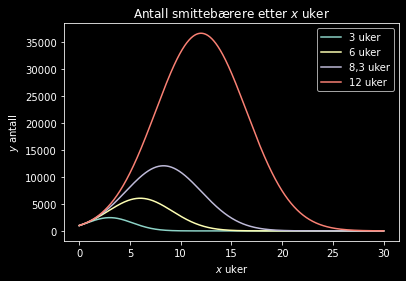

In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x')             # definerer x som sympy symbol

a = 1000                       # startantall smittede
R_0 = 1.6                      # start R-tall

def f(uker):
    # funksjon for antall smittede som tar inn antall uker før R
    # er gått ned til 1 som parameter

    R = ((1-R_0)/uker) * x + 1.6        # Finner den lineære funksjonen R(x)
    return a*sp.exp(sp.integrate(R-1))  # Retunerer a*e^{\int(R(x)-1)dx}


print("f_3(x) =", f(3))
print("f_6(x) =", f(6))
print("f_12(x) =", f(12))

S_3 = sp.integrate(f(3),(x,0,3))
S_6 = sp.integrate(f(6),(x,0,6))
S_12 = sp.integrate(f(12),(x,0,12))
print("\n--------------------------------")
print("Oppgave d")
print(f"Antall smittede fram til smittetopp f_3: {S_3.evalf():.2f}")
print(f"Antall smittede fram til smittetopp f_6: {S_6.evalf():.2f}")
print(f"Antall smittede fram til smittetopp f_12: {S_12.evalf():.2f}")

print("\n--------------------------------")
print("Oppgave e")
# prøver meg fram med ulike løsninger
smittetopp = 0
i = 6
while smittetopp < 12000:
    i += 0.1
    smittetopp = f(i).subs(x,i)
print(f"Hvis smittetallet går ned til 1 i løpet av {i-0.1:.2f} uker, så blir smittetoppen {f(i-0.1).subs(x,i-0.1):.0f} smittebærere, altså mindre enn 12000.")
print(f"Hvis smittetallet går ned til 1 i løpet av {i:.2f} uker så blir smittetoppen {smittetopp:.0f} smittebærere, altså rett over 12 000.")

x_verdier = np.linspace(0,30,1000)
f_3 = sp.lambdify(x, f(3), "numpy")
f_6 = sp.lambdify(x, f(6), "numpy")
f_8 = sp.lambdify(x, f(i), "numpy")
f_12 = sp.lambdify(x, f(12), "numpy")

#for i in x_verdier:
#     f_3.append(f(3).subs(x,i))
    # f_6.append(f(6).subs(x,i))
    # f_8.append(f(8.3).subs(x,i))
    # f_12.append(f(12).subs(x,i))


plt.figure()
plt.plot(x_verdier,f_3(x_verdier))
plt.plot(x_verdier,f_6(x_verdier))
plt.plot(x_verdier,f_8(x_verdier))
plt.plot(x_verdier,f_12(x_verdier))
plt.legend(["3 uker", "6 uker", "8,3 uker", "12 uker"])
plt.title("Antall smittebærere etter $x$ uker")
plt.xlabel("$x$ uker")
plt.ylabel("$y$ antall")
plt.show()


In [8]:
smittetopp

12061.2761204447

In [16]:
a = 10000
while a > 1000:
	a = a / 2
	print(a)

5000.0
2500.0
1250.0
625.0
